In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from src.cleaner import DoubleStepCleaner

In [16]:
cleaner = DoubleStepCleaner(**cleaning_config)

In [38]:
# img = tifffile.imread("/autofs/HD-LSDF/sd20d002/segmentations/workshop/medaka_decropped/508.tif")
# msk = tifffile.imread("/autofs/HD-LSDF/sd20d002/segmentations/workshop/eye_decropped/01-508.tif")

img = tifffile.imread("/autofs/LSDF/projects/code-vita/Medaka/2018_11/Medaka_508_33-1/scaled_0.5_8bit_cropped_slices.tif")
msk = tifffile.imread("/autofs/LSDF/projects/code-vita/Medaka/2018_11/Medaka_508_33-1/eyes_scaled_0.5_8bit_cropped_slices.tif")

(2192, 560, 624)
[0 0 0]
1979


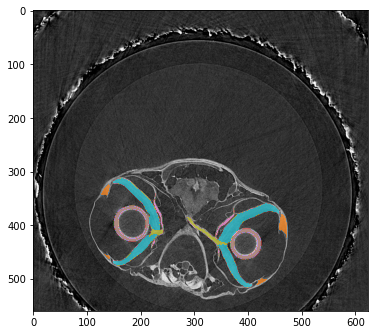

In [41]:
ne_slc = np.where(msk.sum((1, 2))>0)[0]
slice_id = ne_slc[len(ne_slc)//2]

print(msk.shape)
print(np.array(msk.shape) - np.array(img.shape))
print(slice_id)

plt.figure(figsize=(6, 6))
plt.imshow(img[slice_id], cmap='gray')
plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*0.7)
plt.show()

In [75]:
cleaning_config = {
    'bounding_boxes': 2,
    'bbox_cleaning_type': '1d',
    'connected_areas_per_label':
        [
            {'id': 1, 'connected_regions': 2},
            {'id': 3, 'connected_regions': 2},
            {'id': 4, 'connected_regions': 0.01},
            {'id': 5, 'connected_regions': 2},
            {'id': 6, 'connected_regions': 2}
        ]
    }

In [123]:
msk_clean, roi = cleaner(msk)

print(roi)
print(msk.shape)
print(msk[roi].shape)

(slice(1409, 2085, None), slice(257, 518, None), slice(23, 475, None))
(2192, 560, 624)
(676, 261, 452)


(676, 261, 452)
581


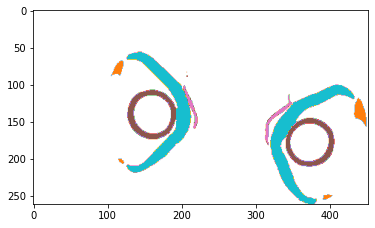

In [127]:
ne_slc = np.where(msk_clean.sum((1, 2))>0)[0]
slice_id = ne_slc[len(ne_slc)//2]

print(msk_clean.shape)
print(slice_id)
plt.imshow(msk_clean[slice_id], cmap='tab10', alpha=(msk_clean[slice_id]>0)*1.0)
plt.show()